<a href="https://colab.research.google.com/github/csoren66/Time-Series-Forecasting/blob/main/UnivariateTimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten 

In [2]:
# prepraring independent and dependent features
def prepare_data(timeseries_data, n_features):
  X, y = [], []
  for i in range(len(timeseries_data)):
    # find the end of this pattern
    end_ix = i + n_features
    # check if we are beyond the the sequence
    if end_ix > len(timeseries_data) - 1:
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
    X.append(seq_x)
    y.append(seq_y)

  return np.array(X), np.array(y)


In [3]:
# define the input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [4]:
print(X), print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [5]:
X.shape

(6, 3)

In [6]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [7]:
X.shape

(6, 3, 1)

### Buliding LSTM Model

In [8]:
# define
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

#fit model
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 4s 4s/step - loss: 32277.7090
Epoch 2/300
1/1 [==============================] - 0s 16ms/step - loss: 31076.9590
Epoch 3/300
1/1 [==============================] - 0s 16ms/step - loss: 30149.1973
Epoch 4/300
1/1 [==============================] - 0s 16ms/step - loss: 29357.4004
Epoch 5/300
1/1 [==============================] - 0s 14ms/step - loss: 28620.7012
Epoch 6/300
1/1 [==============================] - 0s 16ms/step - loss: 27858.3027
Epoch 7/300
1/1 [==============================] - 0s 16ms/step - loss: 27009.7598
Epoch 8/300
1/1 [==============================] - 0s 16ms/step - loss: 26092.1387
Epoch 9/300
1/1 [==============================] - 0s 15ms/step - loss: 25102.2285
Epoch 10/300
1/1 [==============================] - 0s 16ms/step - loss: 24246.6953
Epoch 11/300
1/1 [==============================] - 0s 15ms/step - loss: 23531.2676
Epoch 12/300
1/1 [==============================] - 0s 15ms/step - loss: 22656.4668
Epo

### Predicting the next 10 data

In [12]:
# demonstrate prediction for next 10 days
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[221.48128]
1 day input [196.         210.         221.48127747]
1 day output [[231.44946]]
2 day input [210.         221.48127747 231.44946289]
2 day output [[245.00063]]
3 day input [221.48128 231.44946 245.00063]
3 day output [[255.6897]]
4 day input [231.44946 245.00063 255.6897 ]
4 day output [[267.10638]]
5 day input [245.00063 255.6897  267.10638]
5 day output [[280.45035]]
6 day input [255.6897  267.10638 280.45035]
6 day output [[291.47415]]
7 day input [267.10638 280.45035 291.47415]
7 day output [[304.30032]]
8 day input [280.45035 291.47415 304.30032]
8 day output [[317.62427]]
9 day input [291.47415 304.30032 317.62427]
9 day output [[329.8234]]
[221.48128, 231.44946, 245.00063, 255.6897, 267.10638, 280.45035, 291.47415, 304.30032, 317.62427, 329.8234]


In [13]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [14]:
len(timeseries_data)

9

In [15]:
lst_output

[221.48128,
 231.44946,
 245.00063,
 255.6897,
 267.10638,
 280.45035,
 291.47415,
 304.30032,
 317.62427,
 329.8234]

Data Visualization

In [18]:
import matplotlib.pyplot as plt

In [19]:
day_new = np.arange(1, 10)
day_pred = np.arange(10, 20)

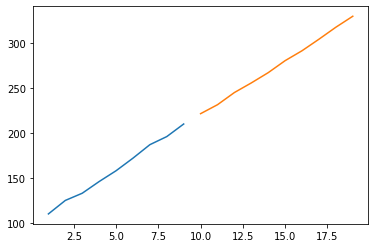

In [21]:
plt.plot(day_new, timeseries_data)
plt.plot(day_pred, lst_output)